In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error,root_mean_squared_error
from sklearn.linear_model import LinearRegression,Lasso,Ridge
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor

In [2]:
# pip install catboost

In [3]:
# import CSV 
df = pd.read_csv(r'data/stud.csv')
df.head()

,gender,race_ethnicity,parental_level_of_education,lunch,test_preparation_course,math_score,reading_score,writing_score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


In [4]:
## Preparing x and y variables
X = df.drop(columns = ['math_score'],axis=1)
y = df['math_score']

In [5]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
cat_features = X.select_dtypes(include="object").columns

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder()

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, cat_features),
         ("StandardScaler", numeric_transformer, num_features),        
    ]
)

In [6]:
X = preprocessor.fit_transform(X)

In [7]:
X.shape

(1000, 19)

## Splitting data

In [8]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=20)

print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(800, 19) (800,)
(200, 19) (200,)


### Create Evaluation function

In [9]:
def model_eval(y_test,y_pred):
    mae = mean_absolute_error(y_test,y_pred)
    mse = mean_squared_error(y_test,y_pred)
    r2 = r2_score(y_test,y_pred)
    rmse = root_mean_squared_error(y_test,y_pred)

    return mae,mse,r2,rmse

In [10]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}

model_list = []
r2_list = []

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train,y_train)

    # makde prediction 
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Model evaluation 
    mae_test,mse_test,r2_test,rmse_test = model_eval(y_pred_test,y_test)
    mae_train,mse_train,r2_train,rmse_train = model_eval(y_pred_train,y_train) 

 
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_train))
    print("- Mean Absolute Error: {:.4f}".format(mae_train))
    print("- R2 Score: {:.4f}".format(r2_train))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(rmse_test))
    print("- Mean Absolute Error: {:.4f}".format(mse_train))
    print("- R2 Score: {:.4f}".format(r2_train))
    r2_list.append(r2_train)
    
    print('='*35)
    print('\n')


    

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 5.2761
- Mean Absolute Error: 4.2055
- R2 Score: 0.8632
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5396
- Mean Absolute Error: 27.8372
- R2 Score: 0.8632


Lasso
Model performance for Training set
- Root Mean Squared Error: 6.4936
- Mean Absolute Error: 5.1109
- R2 Score: 0.7123
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 6.5424
- Mean Absolute Error: 42.1670
- R2 Score: 0.7123


Ridge
Model performance for Training set
- Root Mean Squared Error: 5.2763
- Mean Absolute Error: 4.2044
- R2 Score: 0.8627
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 5.5410
- Mean Absolute Error: 27.8396
- R2 Score: 0.8627


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 5.7066
- Mean Absolute Error: 4.5020
- R2 Score: 0.8010
--------------------

### Results

In [11]:
# Creating the DataFrame
best_model = pd.DataFrame()
best_model['name'] = model_list
best_model['r2_list'] = r2_list

# Sorting and resetting index
best_model = best_model.sort_values(by='r2_list', ascending=False).reset_index(drop=True)
best_model

,name,r2_list
0,Decision Tree,0.999730
1,XGBRegressor,0.996803
2,Random Forest Regressor,0.977094
3,CatBoosting Regressor,0.959311
4,Linear Regression,0.863151
5,Ridge,0.862724
6,AdaBoost Regressor,0.828211
7,K-Neighbors Regressor,0.801039
8,Lasso,0.712296


In [12]:
lin_model = LinearRegression(fit_intercept=True)
lin_model = lin_model.fit(X_train, y_train)
y_pred = lin_model.predict(X_test)
score = r2_score(y_test, y_pred)*100
print(" Accuracy of the model is %.2f" %score)

 Accuracy of the model is 86.25


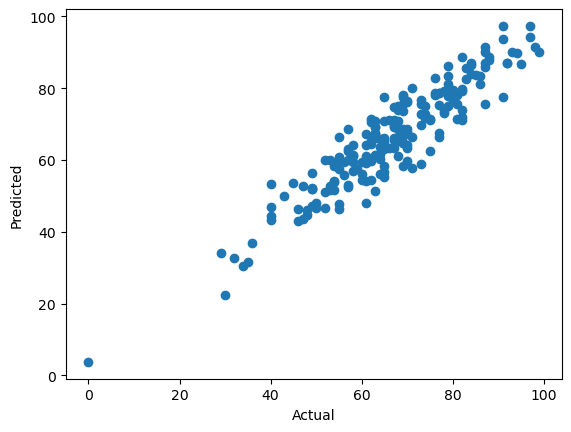

In [13]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

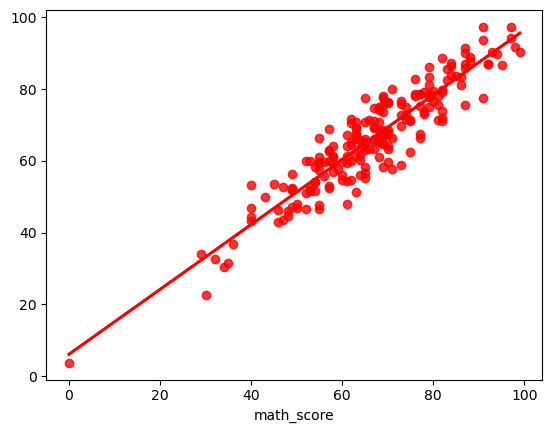

In [14]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='red');